#Data Load

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Libs

In [9]:
def import_modules():
    global utils, pd, np, gc, signal, glob, os, warnings
    import pandas as pd
    import numpy as np
    import gc
    import signal
    import glob
    import os
    import utils
    import warnings

In [2]:
import_modules()

In [3]:
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

#Wrapper

In [4]:
def clear_globals():
    """Очистка глобальных переменных"""
    keep_vars = ['utils', 'import_modules', 'gc', 'columns', 'path_to_dir', 'clear_globals']
    for var in list(globals().keys()):
        if var not in keep_vars:
            del globals()[var]

    import_modules()
    pd.set_option('display.max_columns', None)
    warnings.filterwarnings("ignore")

In [5]:
path_to_dir = '/content/drive/MyDrive/Quant/dataset_test'

columns = ['ServerTimestamp [epoch]',
           'MarketTimestamp [epoch]',
           'ServerTimestamp [datatime, us]',
           'MarketTimestamp [datatime,us]',
           'Mdtype',
           '[price;qty;nborders] ask 0',
           '[price;qty;nborders] ask 1',
           '[price;qty;nborders] ask 2',
           '[price;qty;nborders] ask 3',
           '[price;qty;nborders] ask 4',
           '[price;qty;nborders] ask 5',
           '[price;qty;nborders] ask 6',
           '[price;qty;nborders] ask 7',
           '[price;qty;nborders] ask 8',
           '[price;qty;nborders] ask 9',
           'M',
           '[price;qty;nborders] bid 0',
           '[price;qty;nborders] bid 1',
           '[price;qty;nborders] bid 2',
           '[price;qty;nborders] bid 3',
           '[price;qty;nborders] bid 4',
           '[price;qty;nborders] bid 5',
           '[price;qty;nborders] bid 6',
           '[price;qty;nborders] bid 7',
           '[price;qty;nborders] bid 8',
           '[price;qty;nborders] bid 9',
           'Obflag',
           'ftflagMSBid ',
           'ftflagMSAsk ',
           'ftflagTLSell ',
           'ftflagTLBuy ',
           'Stream ',
           'Revision ']

Processing file: /content/drive/MyDrive/Quant/dataset_test/Local#FAST_CURR_MD#MOEX_CURR#CETS#USDCNY_TOM.2023-08-14.gz


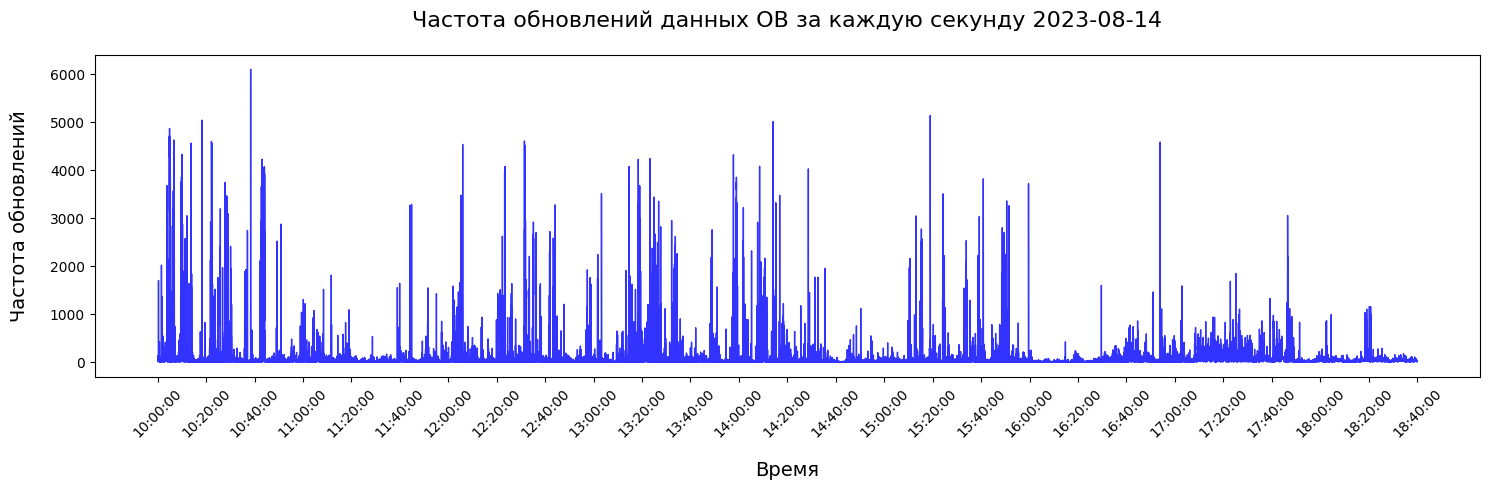

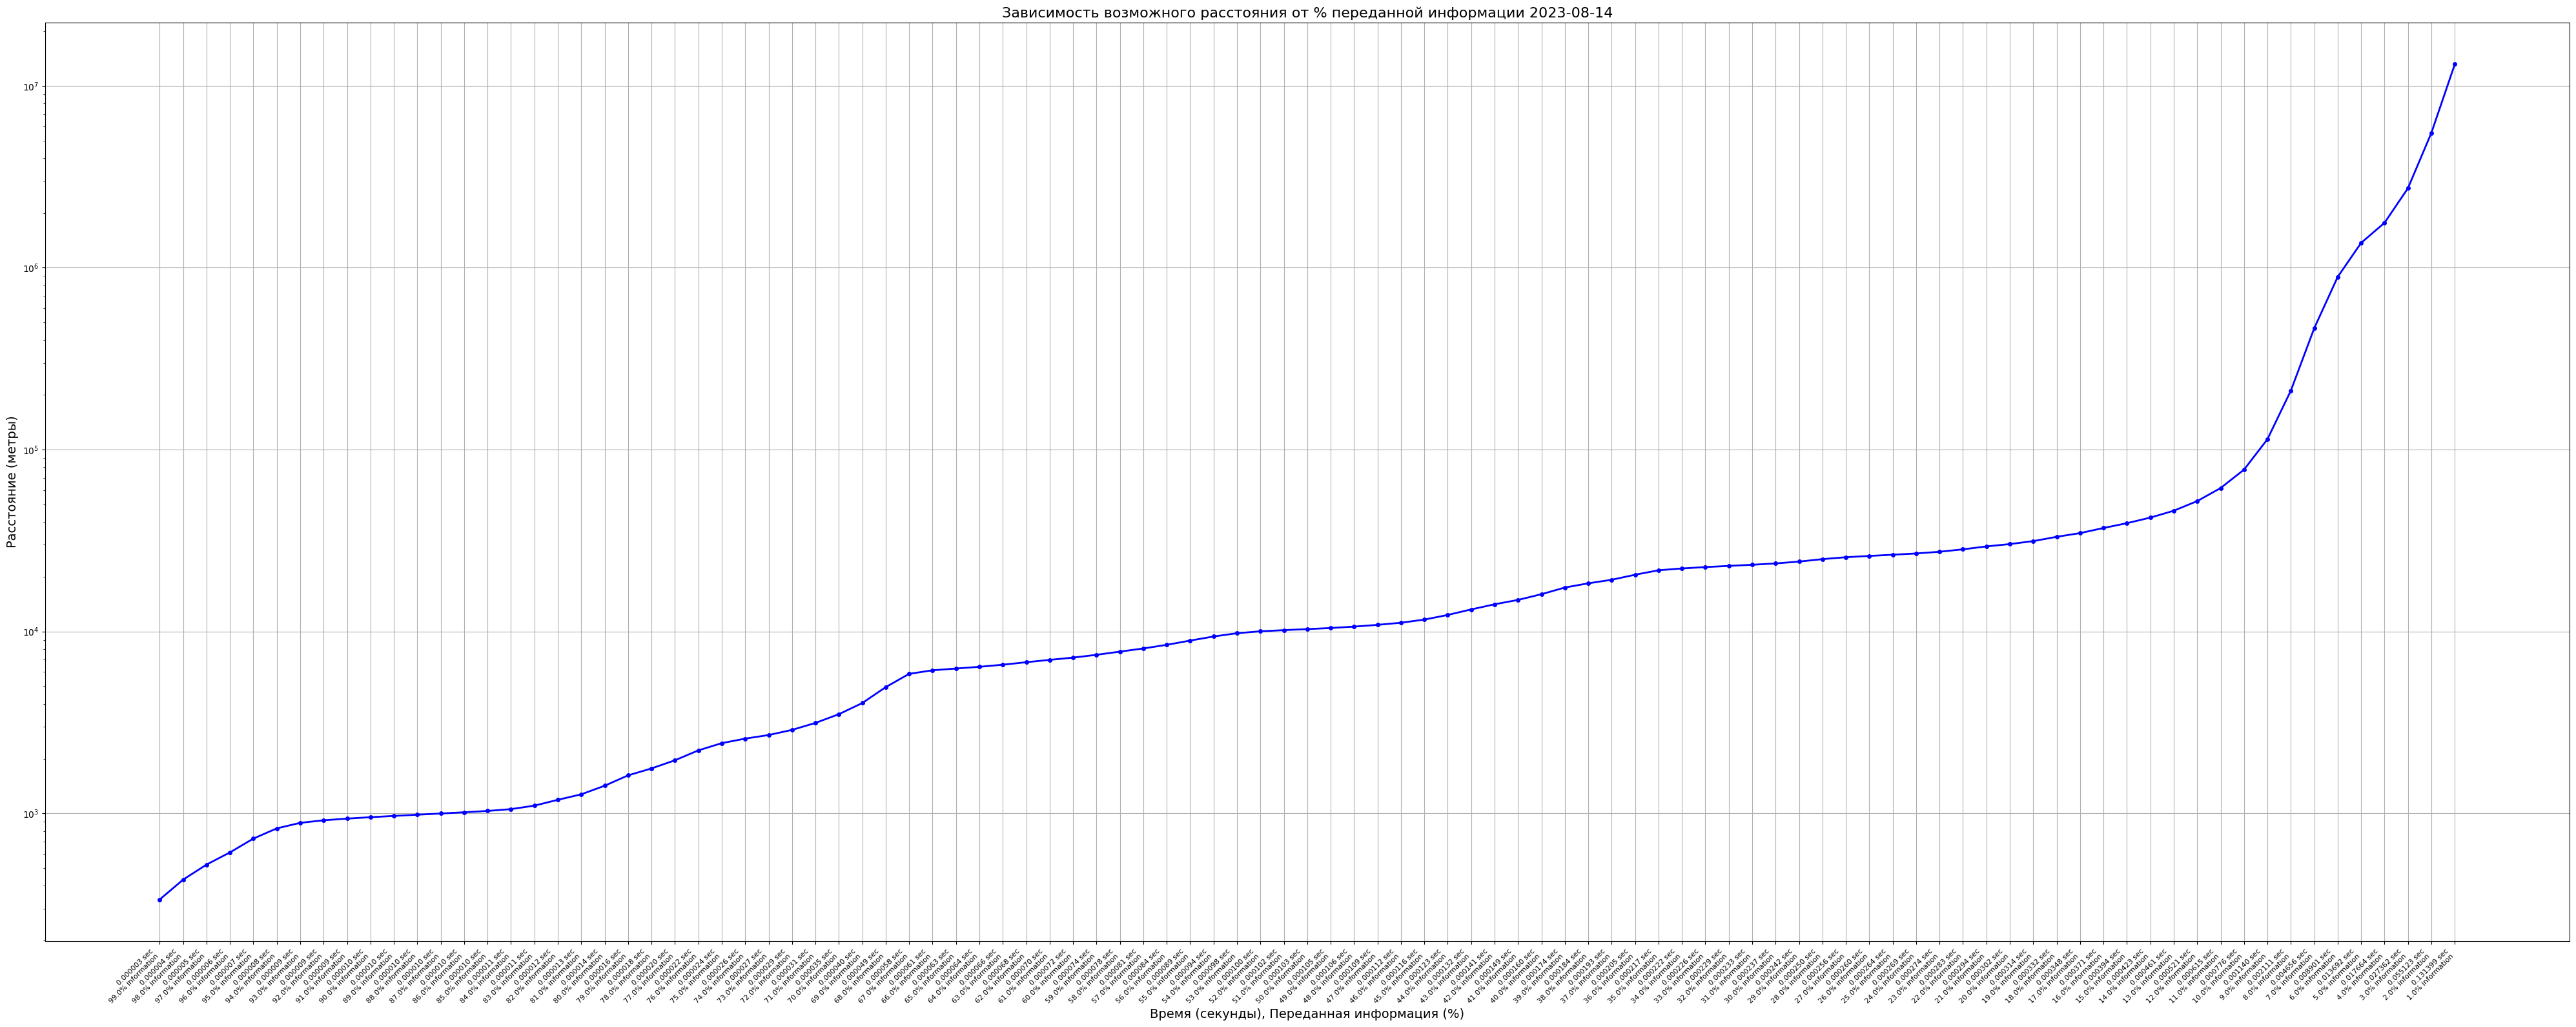


Статистики Qty трейдов 2023-08-14.
Mean: 96.8765243902439
StdDev: 169.76472580726883
Median: 50.0

Percentiles.
60%th Percentile: 66.00
70%th Percentile: 100.00
80%th Percentile: 100.00
90%th Percentile: 150.00

Вероятность совпадения стороны сделки последующего трейда 2023-08-14.
Probability(Qty >= mean): 0.8654
Probability(Qty >= median): 0.8364
Probability(Qty >= mean + stddev): 0.9363
Processing file: /content/drive/MyDrive/Quant/dataset_test/Local#FAST_CURR_MD#MOEX_CURR#CETS#USDCNY_TOM.2023-08-15.gz


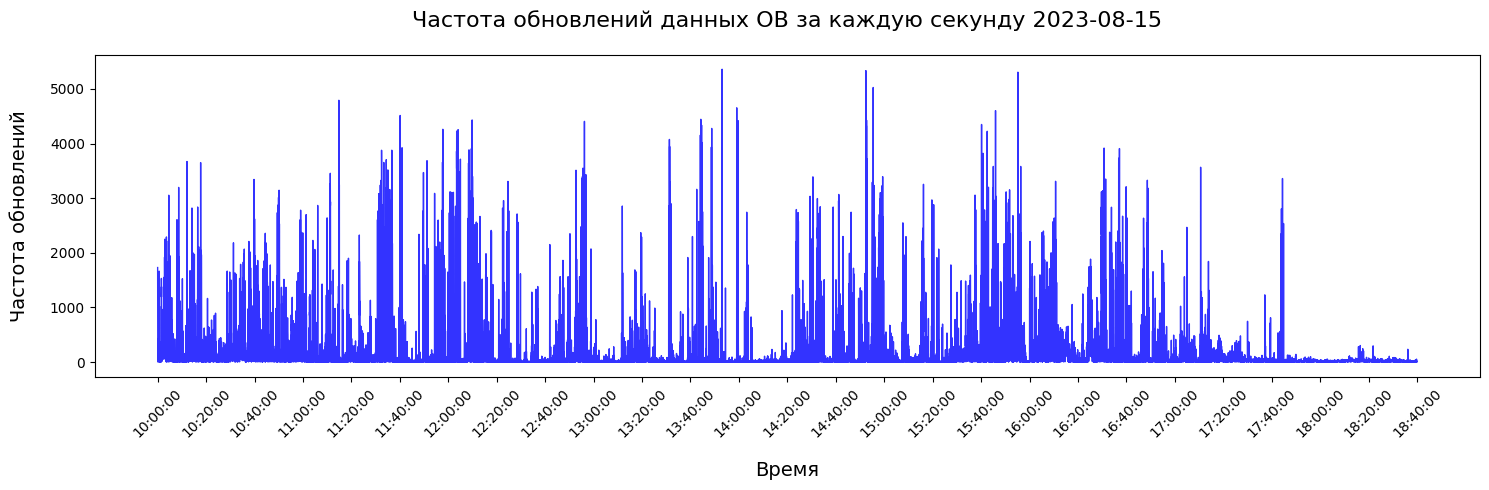

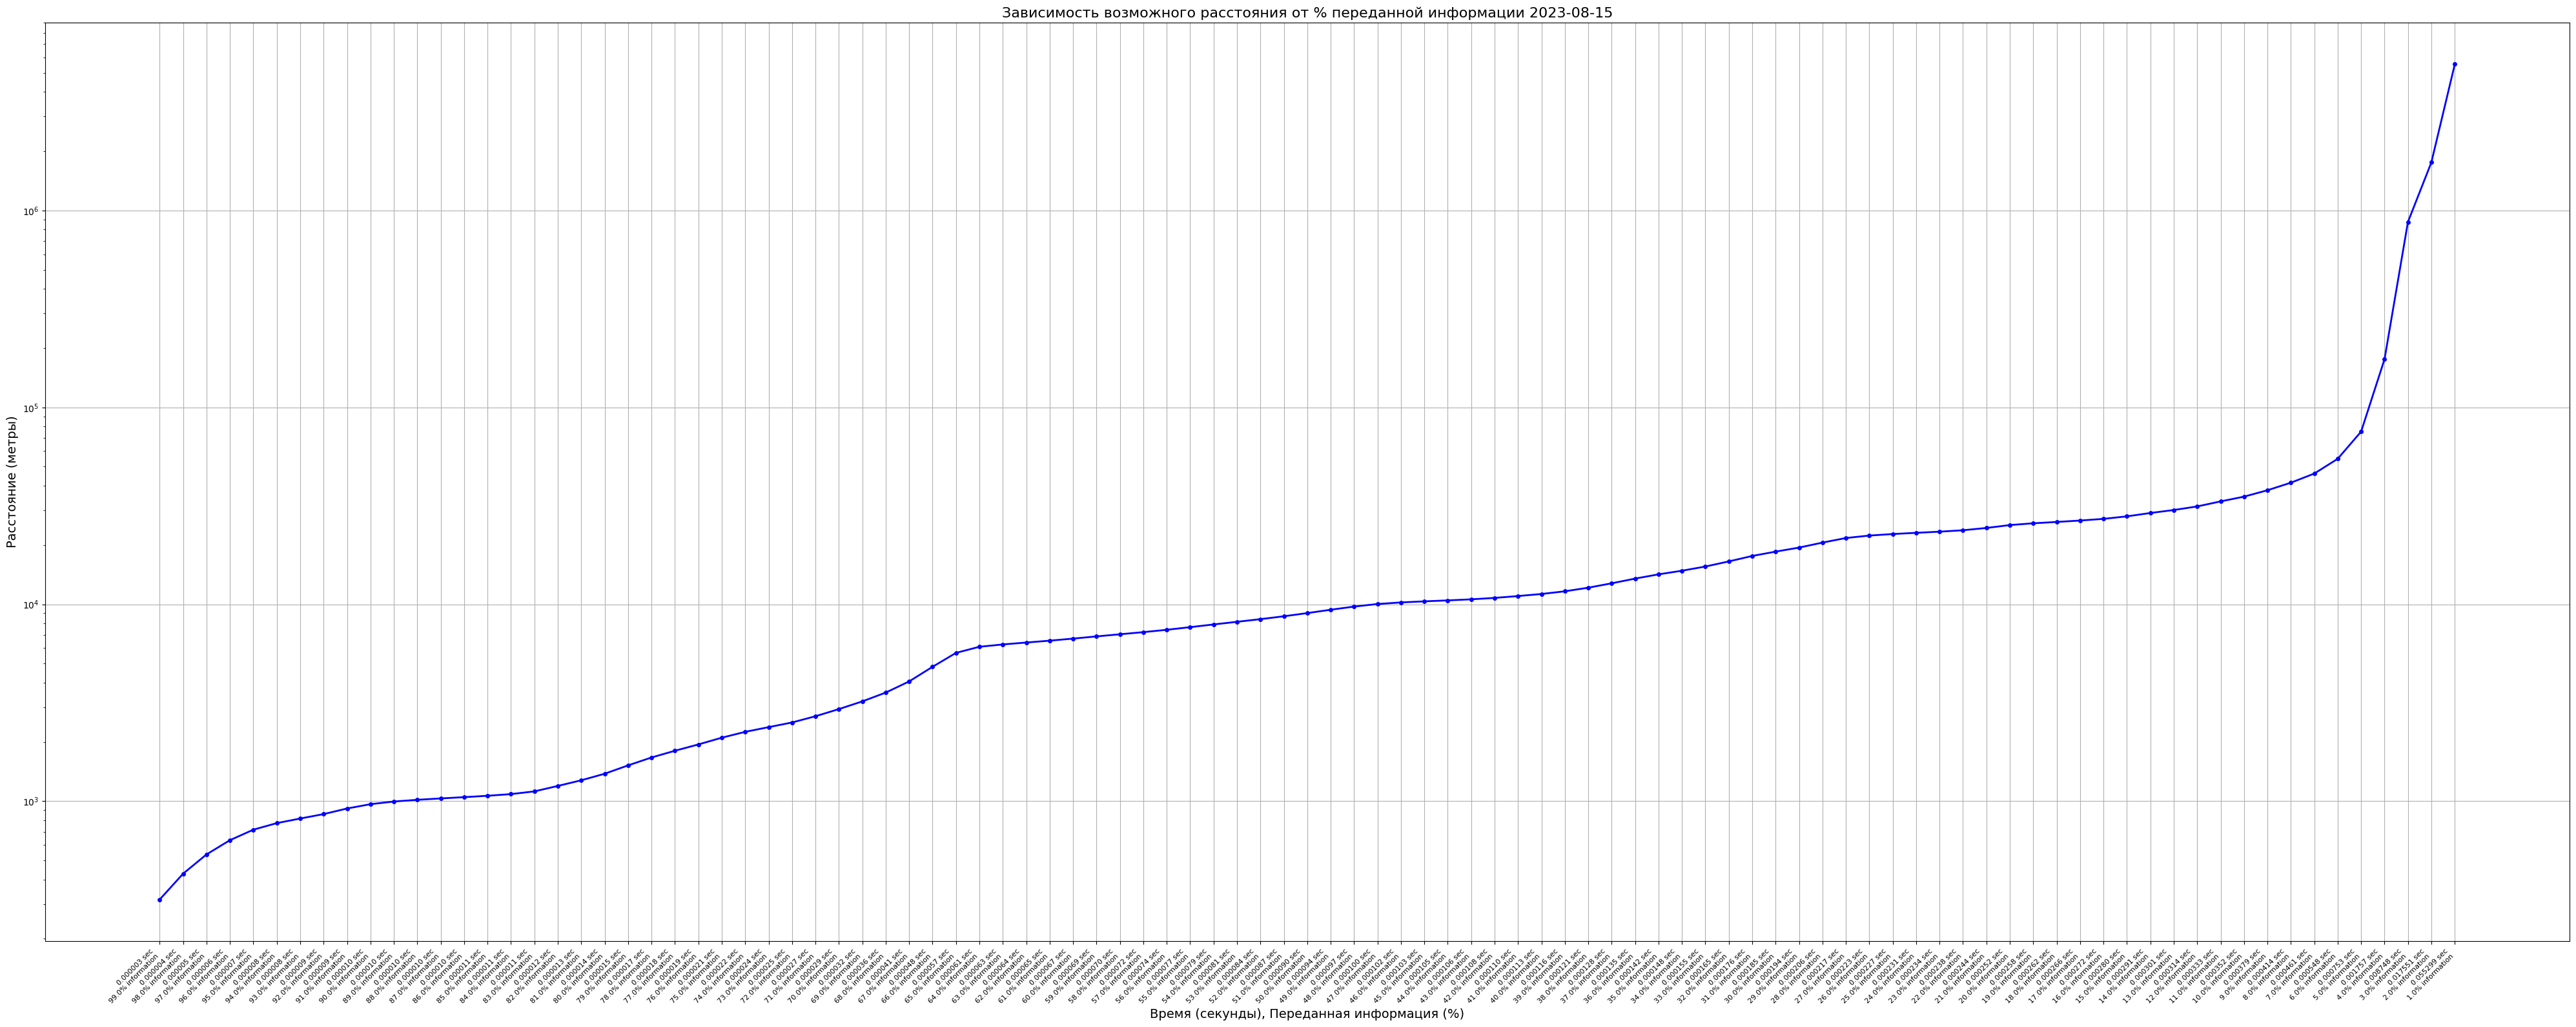


Статистики Qty трейдов 2023-08-15.
Mean: 88.84439504604636
StdDev: 166.56320823024097
Median: 50.0

Percentiles.
60%th Percentile: 55.00
70%th Percentile: 84.00
80%th Percentile: 100.00
90%th Percentile: 150.00

Вероятность совпадения стороны сделки последующего трейда 2023-08-15.
Probability(Qty >= mean): 0.8232
Probability(Qty >= median): 0.8256
Probability(Qty >= mean + stddev): 0.9263
Processing file: /content/drive/MyDrive/Quant/dataset_test/Local#FAST_CURR_MD#MOEX_CURR#CETS#USDCNY_TOM.2023-08-16.gz


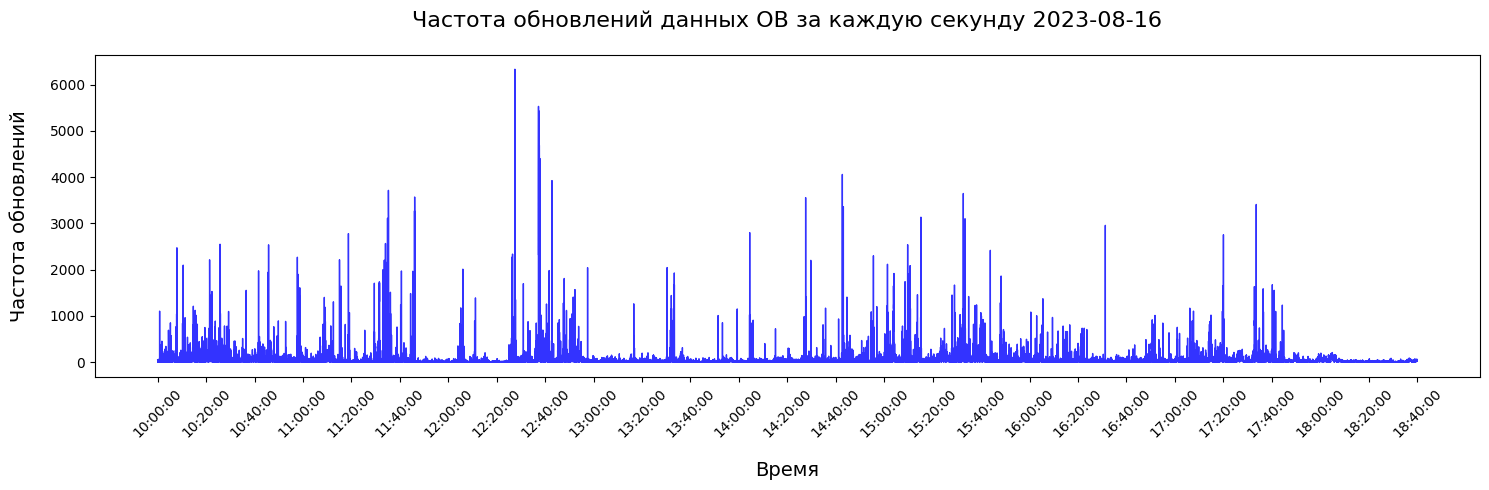

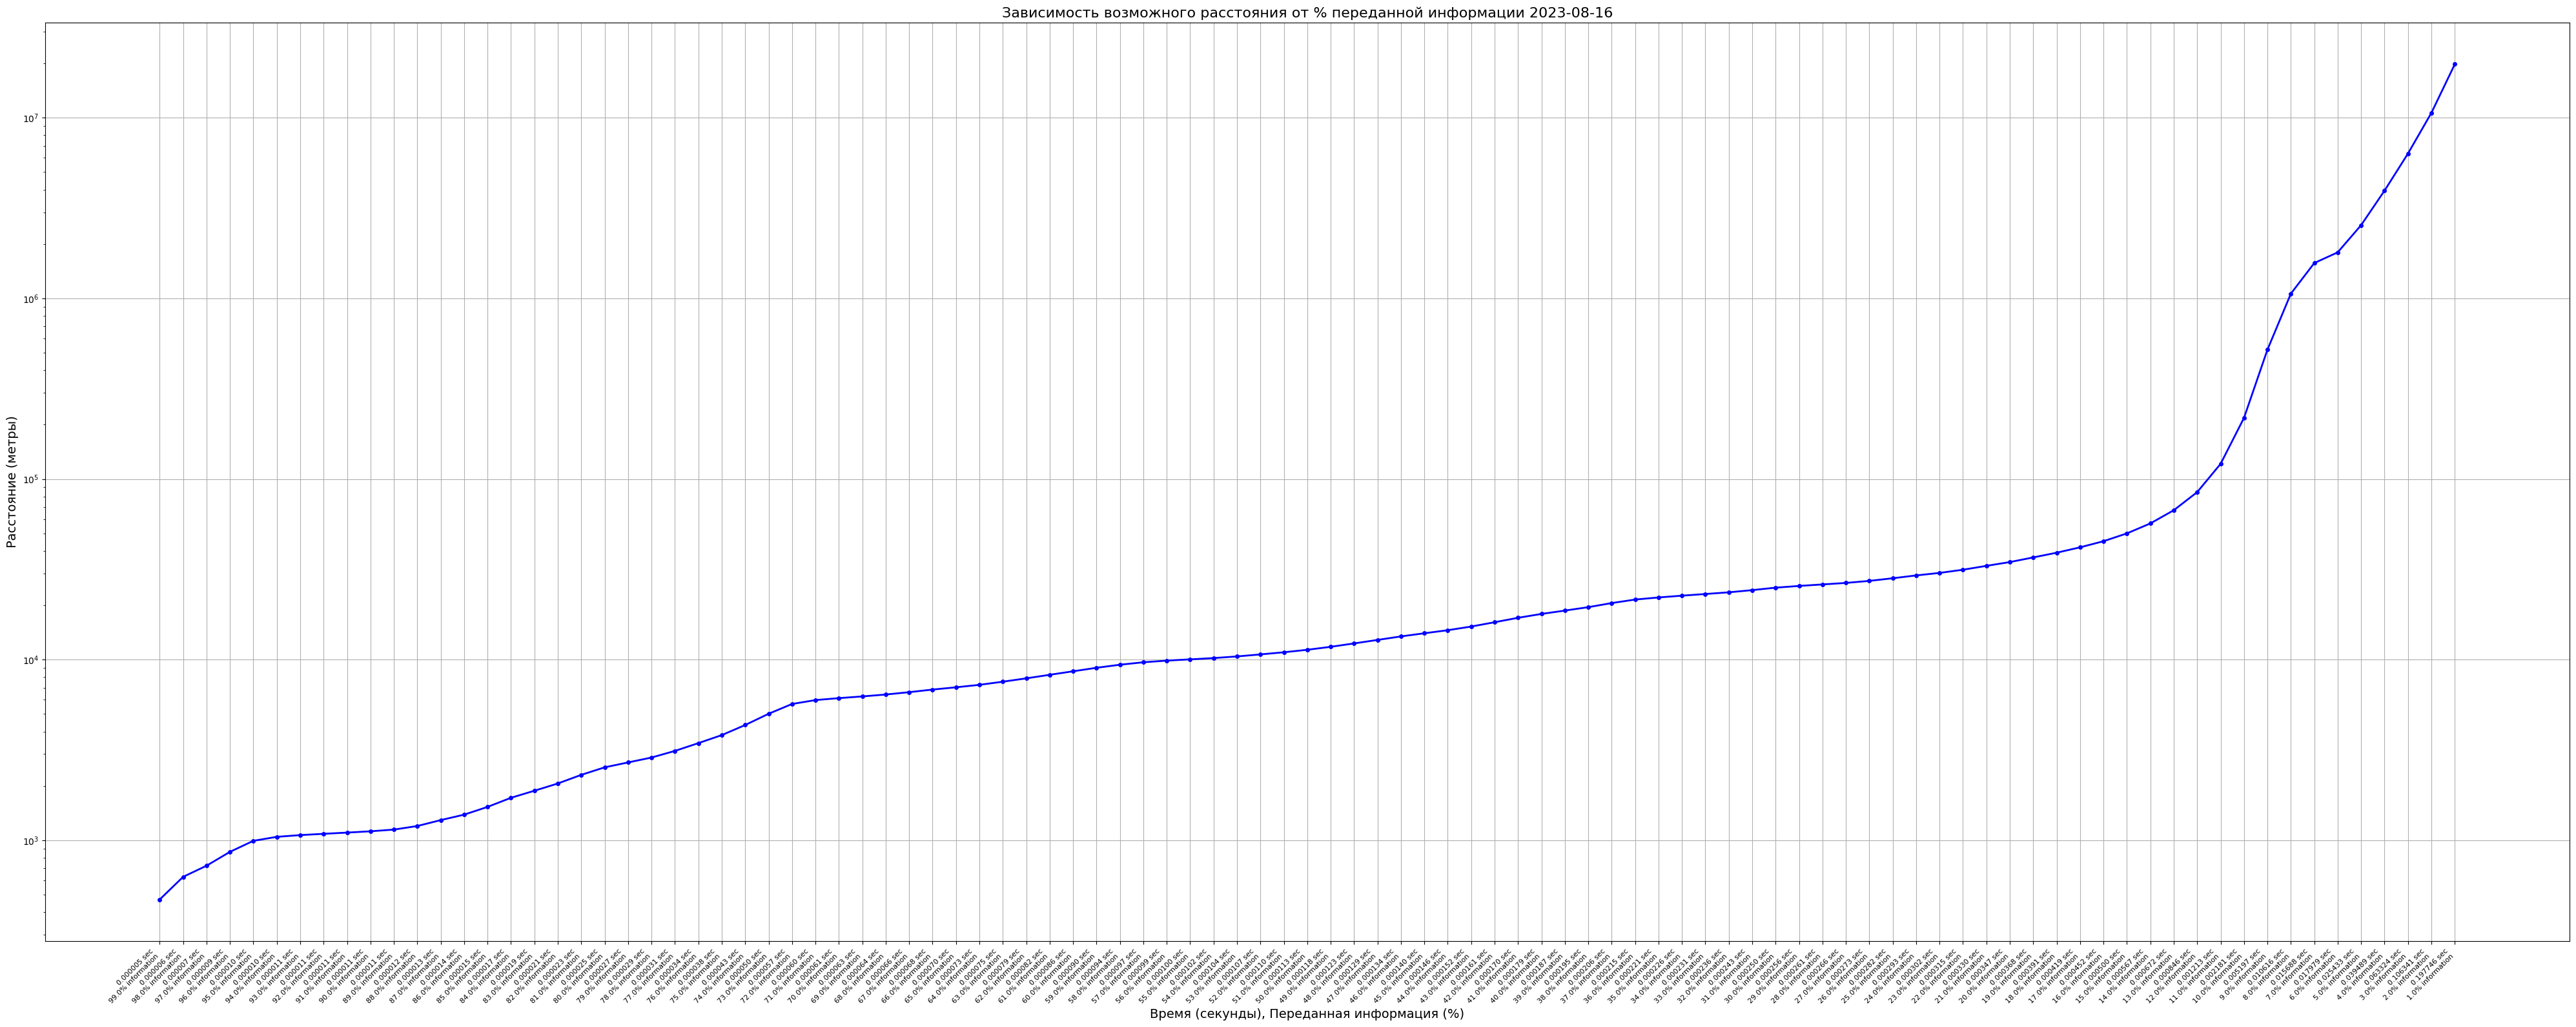


Статистики Qty трейдов 2023-08-16.
Mean: 125.66539196940727
StdDev: 537.0506904494882
Median: 50.0

Percentiles.
60%th Percentile: 70.00
70%th Percentile: 100.00
80%th Percentile: 100.00
90%th Percentile: 153.00

Вероятность совпадения стороны сделки последующего трейда 2023-08-16.
Probability(Qty >= mean): 0.9138
Probability(Qty >= median): 0.8376
Probability(Qty >= mean + stddev): 0.9788
Processing file: /content/drive/MyDrive/Quant/dataset_test/Local#FAST_CURR_MD#MOEX_CURR#CETS#USDCNY_TOM.2023-08-17.gz


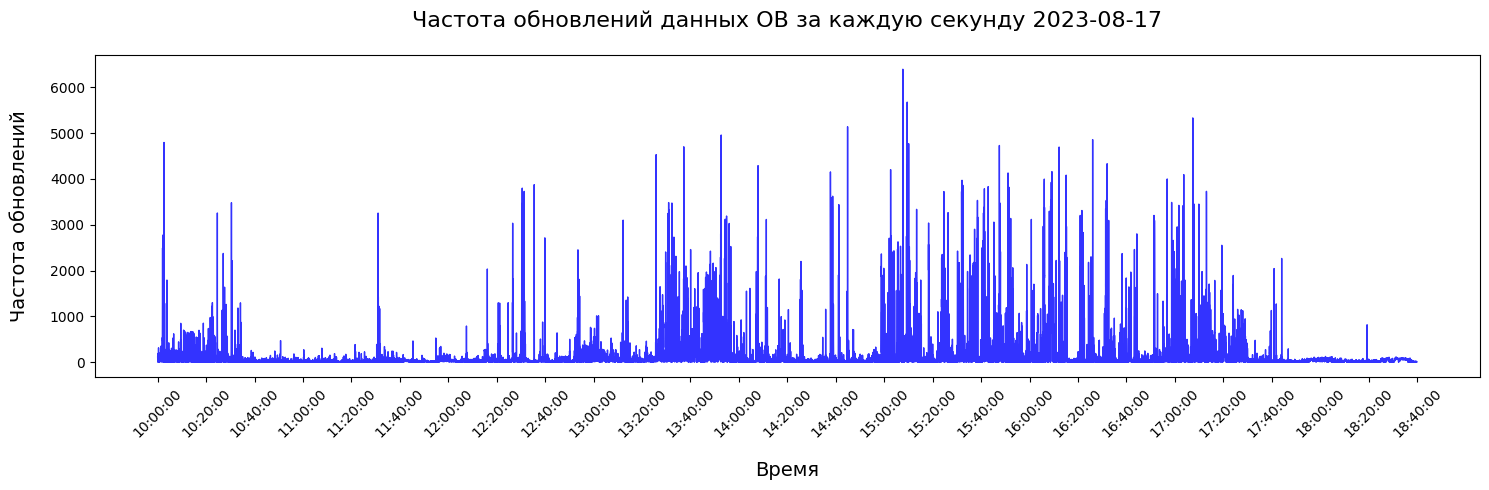

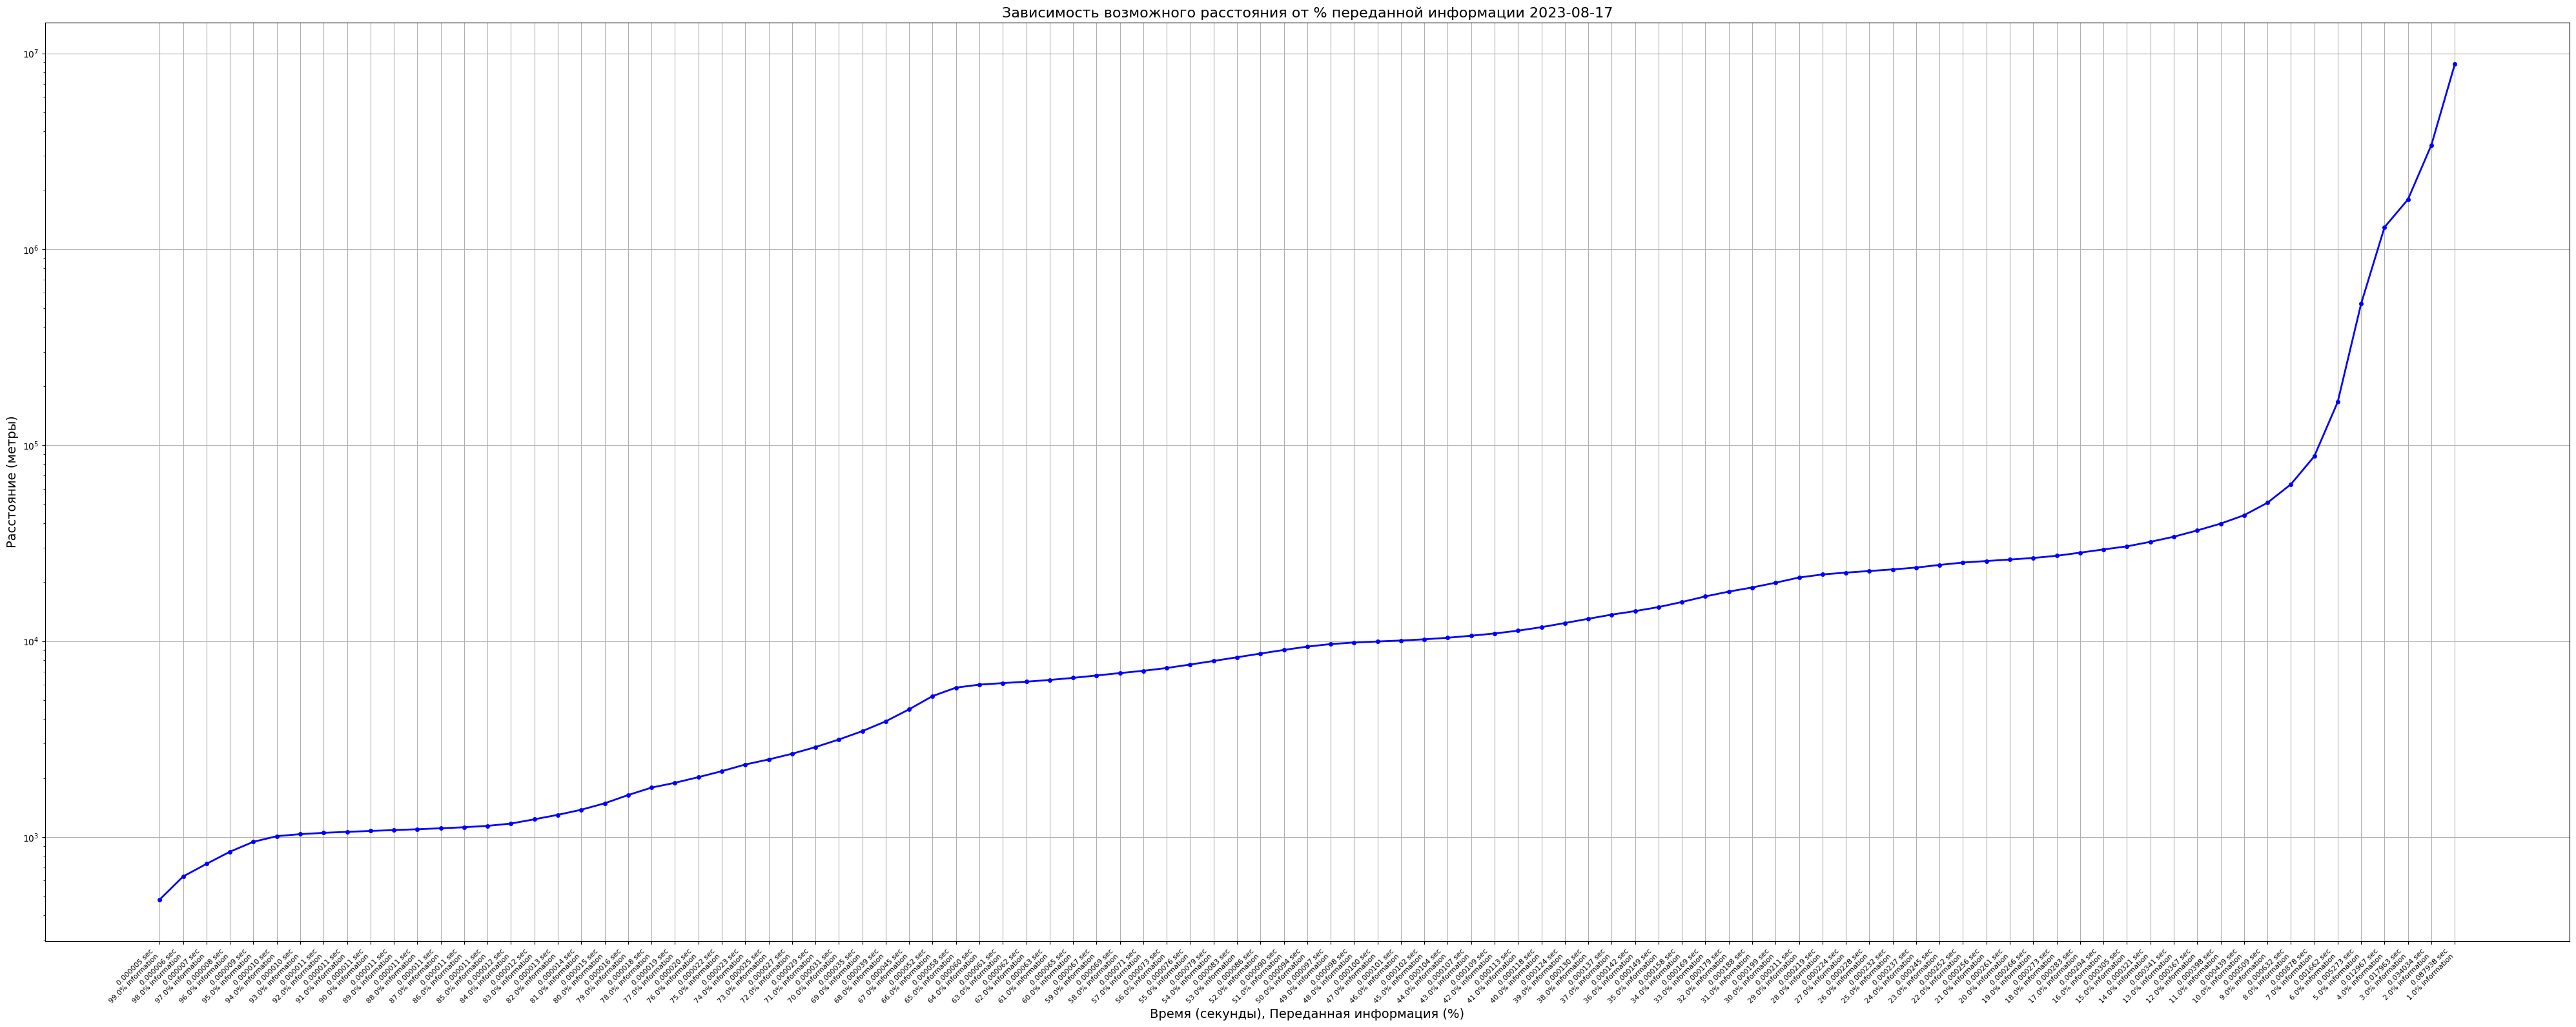


Статистики Qty трейдов 2023-08-17.
Mean: 96.93892985441482
StdDev: 256.21602216500594
Median: 50.0

Percentiles.
60%th Percentile: 56.00
70%th Percentile: 98.00
80%th Percentile: 100.00
90%th Percentile: 150.00

Вероятность совпадения стороны сделки последующего трейда 2023-08-17.
Probability(Qty >= mean): 0.8382
Probability(Qty >= median): 0.8318
Probability(Qty >= mean + stddev): 0.9584
Processing file: /content/drive/MyDrive/Quant/dataset_test/Local#FAST_CURR_MD#MOEX_CURR#CETS#USDCNY_TOM.2023-08-18.gz


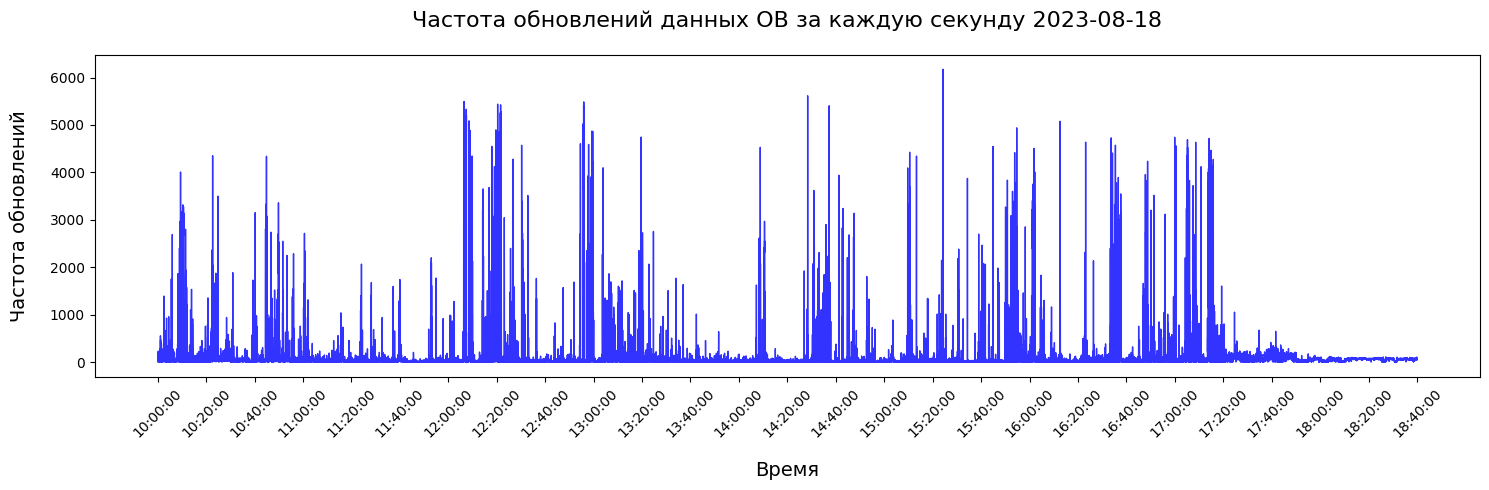

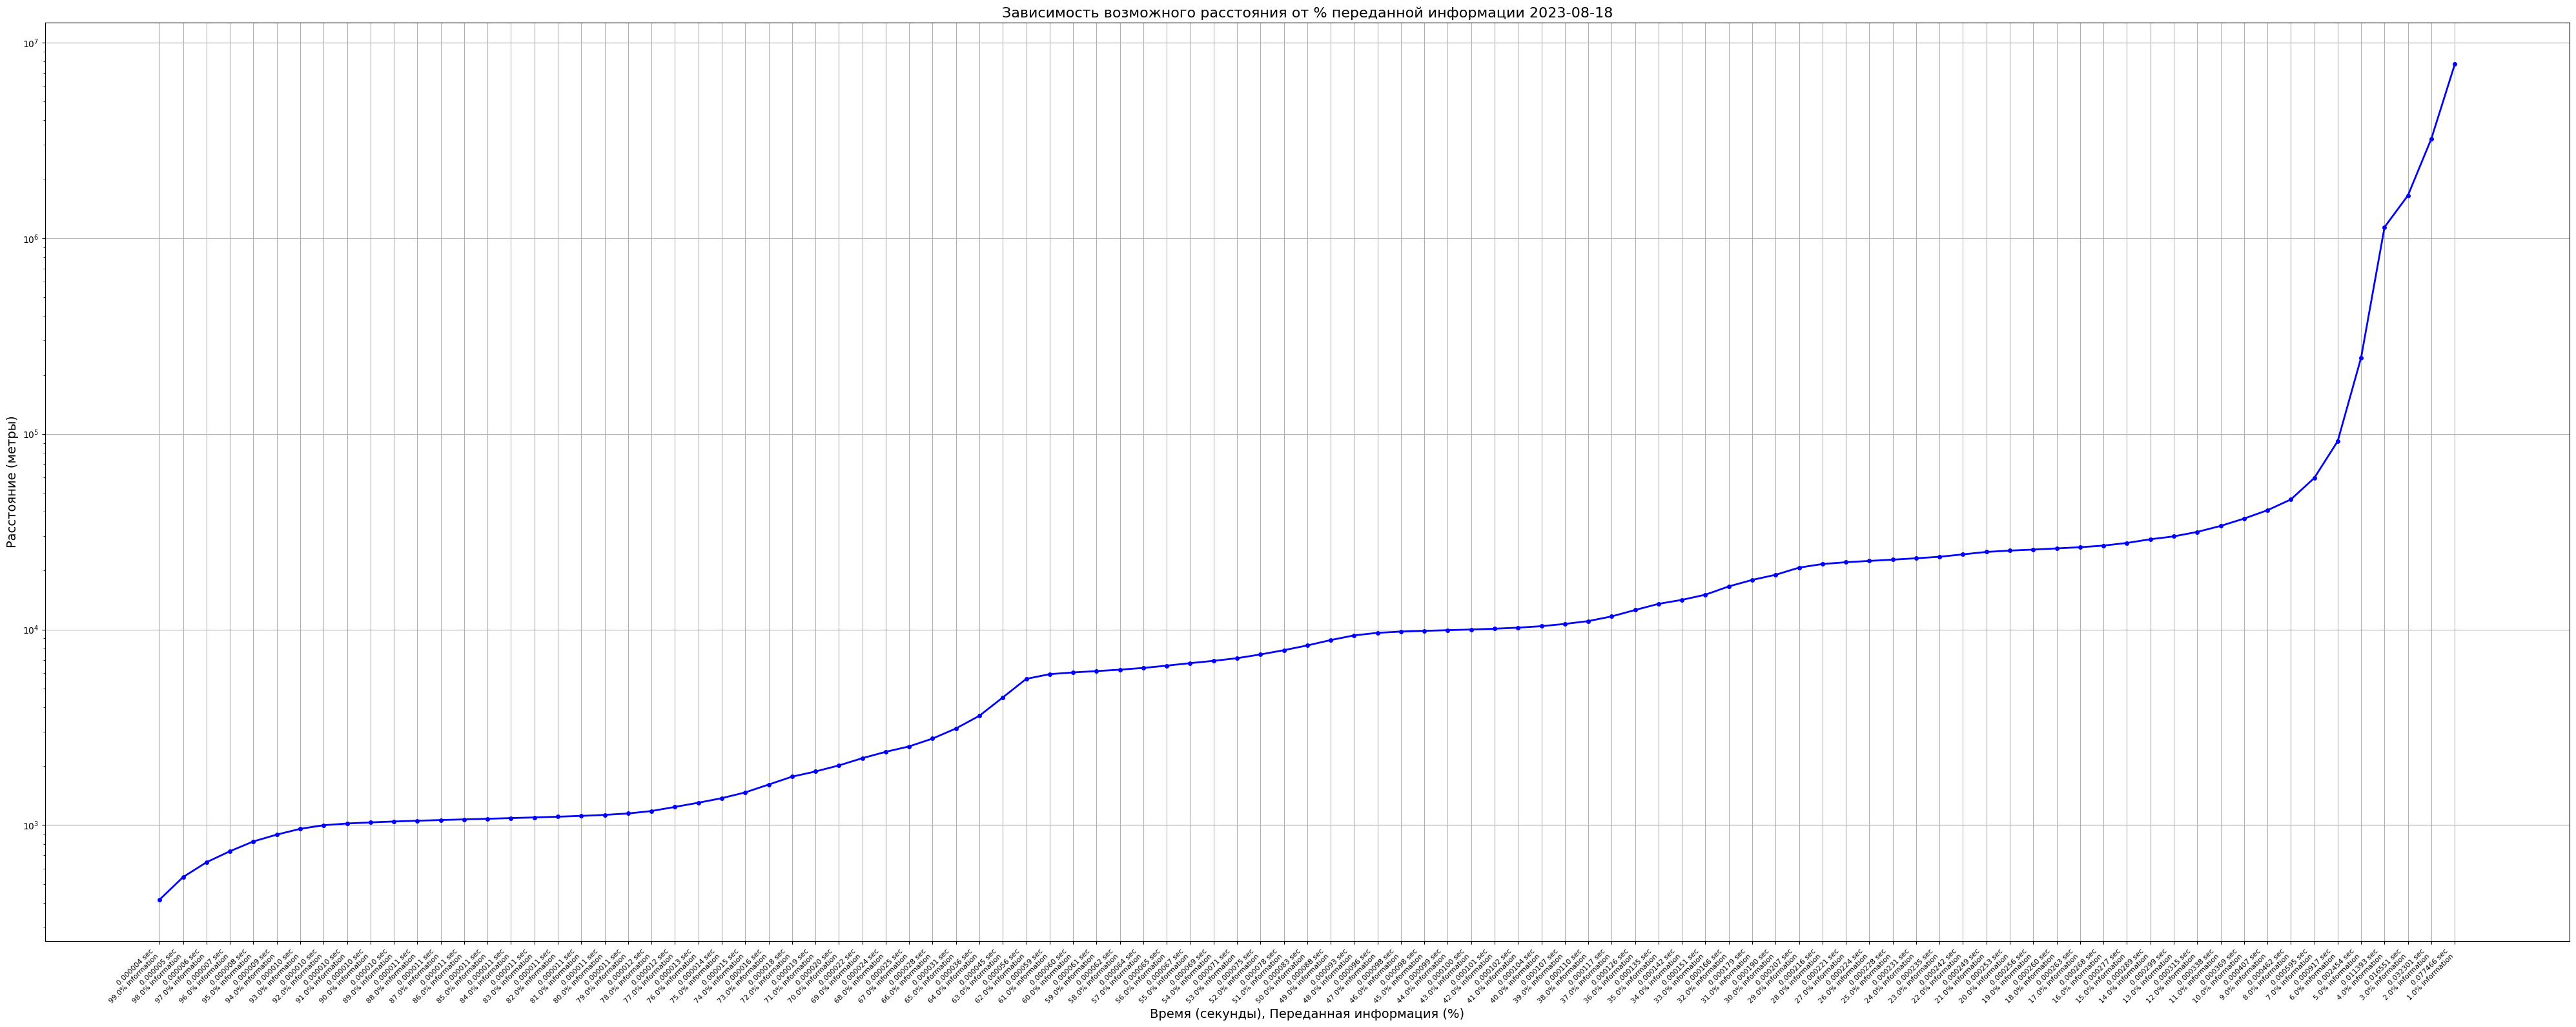


Статистики Qty трейдов 2023-08-18.
Mean: 108.74806110458285
StdDev: 264.3747019975643
Median: 51.0

Percentiles.
60%th Percentile: 84.00
70%th Percentile: 100.00
80%th Percentile: 100.00
90%th Percentile: 151.00

Вероятность совпадения стороны сделки последующего трейда 2023-08-18.
Probability(Qty >= mean): 0.8807
Probability(Qty >= median): 0.8353
Probability(Qty >= mean + stddev): 0.9609


In [6]:
for filename in os.listdir(path_to_dir):
    file_path = os.path.join(path_to_dir, filename)

    if os.path.isfile(file_path) and filename.endswith('.gz'):
        try:
            print(f"Processing file: {file_path}")

            df = pd.read_csv(file_path, compression='gzip', names=columns, low_memory=False)
            df = utils.common_data_preparation(df)

            time = file_path.split('/')[-1].split('.')[1]

            utils.first_task(df, time, path = '/content/drive/MyDrive/Quant/md_task_temp_data/frequency/')
            utils.second_task(df, time, path = '/content/drive/MyDrive/Quant/md_task_temp_data/trades/')

            clear_globals()

        except Exception as e:
            print(f"Error processing file {file_path}")
            clear_globals()

## (Additional) Part 1 - Common frequency

In [ ]:
from matplotlib.dates import DateFormatter
from datetime import datetime
import matplotlib.pyplot as plt

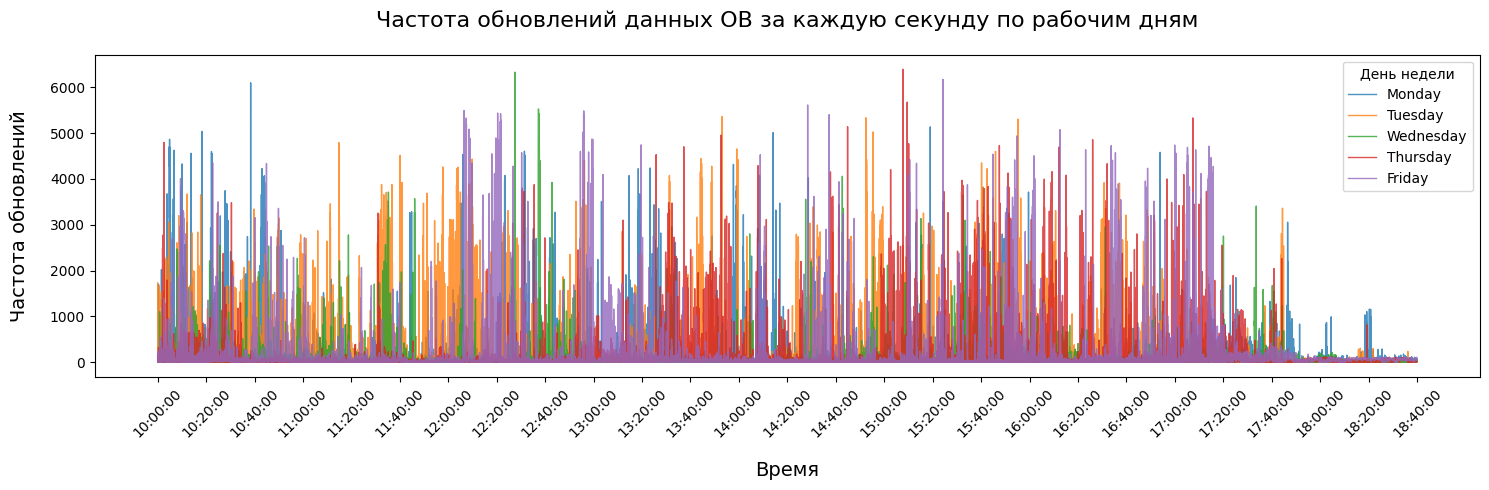

In [11]:
def load_and_combine_frequency_data(folder_path, filenames):
    combined_data = pd.DataFrame()

    for filename in filenames:
        file_path = os.path.join(folder_path, filename)

        if os.path.exists(file_path):
            data = pd.read_csv(file_path)
            date_str = filename.split('_')[-1].split('.')[0]
            date = datetime.strptime(date_str, '%Y-%m-%d')
            day_of_week = date.strftime('%A')
            frequency = data.groupby(['Hour', 'Minute', 'Second']).size()
            frequency.index = pd.to_datetime(frequency.index.map(lambda x: f'{x[0]:02d}:{x[1]:02d}:{x[2]:02d}'), format='%H:%M:%S')

            frequency = frequency.reset_index()
            frequency['Day'] = day_of_week

            combined_data = pd.concat([combined_data, frequency])
        else:
            print(f"File {file_path} does not exist.")

    return combined_data

def plot_combined_frequency(combined_data, start_time='10:00:00', end_time='18:40:00', interval_minutes=20):
    tick_positions = utils.create_time_range(start_time=start_time, end_time=end_time, interval_minutes=interval_minutes)

    plt.figure(figsize=(15, 5))
    for day in combined_data['Day'].unique():
        day_data = combined_data[combined_data['Day'] == day]
        plt.plot(day_data['index'], day_data[0], label=day, linewidth=1, alpha=0.8)

    plt.title(f'Частота обновлений данных ОВ за каждую секунду по рабочим дням', fontsize=16, pad=20)
    plt.xlabel('Время', fontsize=14, labelpad=15)
    plt.ylabel('Частота обновлений', fontsize=14, labelpad=15)
    plt.gca().xaxis.set_major_formatter(DateFormatter('%H:%M:%S'))
    plt.gca().set_xticks(tick_positions)

    plt.xticks(rotation=45, fontsize=10)
    plt.legend(title='День недели')
    plt.tight_layout()
    plt.show()

folder_path = '/content/drive/MyDrive/Quant/md_task_temp_data/frequency'

filenames = [
    'Frequency_data_2023-08-14.csv',  # Monday
    'Frequency_data_2023-08-15.csv',  # Tuesday
    'Frequency_data_2023-08-16.csv',  # Wednesday
    'Frequency_data_2023-08-17.csv',  # Thursday
    'Frequency_data_2023-08-18.csv'   # Friday
]

combined_data = load_and_combine_frequency_data(folder_path, filenames)
plot_combined_frequency(combined_data)

## (Additional) Part 2 - Table of statistics & probs

In [23]:
from IPython.display import display, HTML

In [24]:
def statistics(trade_sizes, time):
    mean_qty = trade_sizes.mean()
    stddev_qty = trade_sizes.std()
    median_qty = trade_sizes.median()
    percentiles = trade_sizes.quantile([0.6, 0.7, 0.8, 0.9])

    percentile_pairs = [(f"{int(p*100)}%", int(v)) for p, v in percentiles.items()]

    return mean_qty, stddev_qty, median_qty, percentile_pairs

def calculate_probabilities(df, trade_sizes, threshold):
    mask = trade_sizes >= threshold
    filtered = df[df['TradeID'].isin(trade_sizes[mask].index)].copy()

    filtered.loc[:, 'prev_side'] = filtered['side'].shift(1)
    filtered.loc[:, 'side_match'] = filtered['side'] == filtered['prev_side']

    matching_sides = filtered['side_match'].sum()
    total_trades = len(filtered)

    probability = matching_sides / total_trades if total_trades > 0 else 0
    return probability

def statistics_and_probs(df, time):
    trade_sizes = df.groupby('TradeID')['Qty'].sum()

    mean_qty, stddev_qty, median_qty, percentiles = statistics(trade_sizes, time)

    prob_mean = calculate_probabilities(df, trade_sizes, mean_qty)
    prob_median = calculate_probabilities(df, trade_sizes, median_qty)
    prob_mean_plus_stddev = calculate_probabilities(df, trade_sizes, mean_qty + stddev_qty)

    return {
        "Date": time,
        "Mean Qty": round(mean_qty, 2),
        "StdDev Qty": round(stddev_qty, 2),
        "Median Qty": round(median_qty, 2),
        "Prob (Qty >= Mean)": round(prob_mean, 4),
        "Prob (Qty >= Median)": round(prob_median, 4),
        "Prob (Qty >= Mean + StdDev)": round(prob_mean_plus_stddev, 4),
        "60th Percentile": percentiles[0][1],
        "70th Percentile": percentiles[1][1],
        "80th Percentile": percentiles[2][1],
        "90th Percentile": percentiles[3][1],
    }

def process_all_files(folder_path, filenames):
    results = []

    for filename in filenames:
        file_path = os.path.join(folder_path, filename)

        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            date_str = filename.split('_')[-1].split('.')[0]
            result = statistics_and_probs(df, date_str)
            results.append(result)
        else:
            print(f"File {file_path} does not exist.")
    results_df = pd.DataFrame(results)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.expand_frame_repr', False)

    # Styling the DataFrame for better readability
    styled_df = results_df.style.format({
        "Mean Qty": "{:.2f}",
        "StdDev Qty": "{:.2f}",
        "Median Qty": "{:.2f}",
        "Prob (Qty >= Mean)": "{:.4f}",
        "Prob (Qty >= Median)": "{:.4f}",
        "Prob (Qty >= Mean + StdDev)": "{:.4f}",
    }).set_table_styles(
        [{'selector': 'th', 'props': [('font-size', '14px')]},
         {'selector': 'td', 'props': [('font-size', '12px')]}]
    ).highlight_max(subset=["Mean Qty", "StdDev Qty", "Median Qty"], color='lightgreen')

    return styled_df

folder_path = '/content/drive/MyDrive/Quant/md_task_temp_data/trades'

filenames = [
    'Trades_2023-08-14.csv',  # Monday
    'Trades_2023-08-15.csv',  # Tuesday
    'Trades_2023-08-16.csv',  # Wednesday
    'Trades_2023-08-17.csv',  # Thursday
    'Trades_2023-08-18.csv'   # Friday
]

styled_results_df = process_all_files(folder_path, filenames)
html_file_path = '/content/drive/MyDrive/Quant/md_task_temp_data/styled_results.html'
styled_results_df.to_html(html_file_path)
display(HTML(html_file_path))

,Date,Mean Qty,StdDev Qty,Median Qty,Prob (Qty >= Mean),Prob (Qty >= Median),Prob (Qty >= Mean + StdDev),60th Percentile,70th Percentile,80th Percentile,90th Percentile
0,2023-08-14,96.88,169.76,50.00,0.8654,0.8364,0.9363,66,100,100,150
1,2023-08-15,88.84,166.56,50.00,0.8232,0.8256,0.9263,55,84,100,150
2,2023-08-16,125.67,537.05,50.00,0.9138,0.8376,0.9788,70,100,100,153
3,2023-08-17,96.94,256.22,50.00,0.8382,0.8318,0.9584,56,98,100,150
4,2023-08-18,108.75,264.37,51.00,0.8807,0.8353,0.9609,84,100,100,151
